# WeatherPy Analysis of data

This project was to analyse and find relationships between the City and, Cloudiness, Country, Date, Humidity, Latitude, Longitude , Maximum Temperature in Celcius, and the Wind Speed in m/s.  This was done by retrieving 500+ random cities and retrieving their stats from their respective JSON file via the Open Weather API.  To analyse this data with respect to Latitude, plots were created to visualise the data and measure any correlations seen.

* The first figure shows a distrinct negative correlation between the maximum temperature and the latitude. The trend shows that the closer the latitude is to zero the higher the temperature.  This means the closer to the equater the warmer the temperature.

* The second figure involves the latitude of the city and the humidity.  The figure displays little to no correlation in either direction.  If anything, it shows that a majority of verified cities are humid and at certain latitudes such as at 60 and 0 degrees with respect to latitudes

* The third figure involved the cloudiness and the city latitude.  Similarly to the second figure, there is no observable trend resulting in similar latitudes having different cloudiness perecentages and vice versa.

* The last figure involves the wind speed in metres per second and latitude. The majority of the cities are lower on the graph showing relative low wind speeds amongst the different latitudes.  There apears to be a vague sense of correlation in the positive direction but this doesn't definitively tell us if the larger the latitude in degrees correlates to the wind speed.

One possible way of finding a correlation of the last three grpahs is to have a 3D graph (x,y,z coords.) with longitude, latitude, and the independent variable.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import os
%matplotlib notebook
# import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    city = city.replace(" ","+")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{base_url}appid={api_key}&units={units}&q={c}"
# response = requests.get(query_url).json()

In [4]:
# cities_list = [f"Processing Record {cities.index(x) +1 } of set 1 | {x}" for x in cities]
# cities_list <- this did not work but is at least a starting point

# variables that were interpreted to be given to me by the starter code.  
# Created them as empty lists

City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lon = []
Max_Temp = []
Wind_Speed = []
# cities_100 = cities[:11] This is for testing so It doesn't take such a long time
# Starting the record count as 1
record_count = 1
units = "metric"
print('''
Beginning and verifying the city retrieval
------------------------------------------
''')
base_url = "http://api.openweathermap.org/data/2.5/weather?"
for c in cities:
    try:
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        # Starting with the url and getting it to append to each city
        query_url = f"{base_url}appid={api_key}&units={units}&q={c}"
        response = requests.get(query_url).json()
        print(f"Sanity Checking the URL\n{query_url}")
        
        # Appending each list as declared above
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lon.append(response['coord']['lat'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        
        c_fixed = c.replace("+"," ")
        
        print(f"\nRecord {record_count} of Set 1 | {c_fixed}")
        print("--------------------------")
        
        # Adding up on the record
        record_count += 1
        
        # I saw that time variable up there so I think it might be
        # a good idea to use it.  Since I can only use 60 requests per
        # minute.  I will make this sleep every 1.5 seconds
        
        time.sleep(1.5)
    except:
#         c_fixed = c.replace("+"," ")
        print(f"\nWas not found: {c}")
#         print("--------------------------")
#         print("Hahahahahahahahaha no.")
        print("--------------------------")
    continue


Beginning and verifying the city retrieval
------------------------------------------

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=barentsburg

Was not found: barentsburg
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=zeya

Record 1 of Set 1 | zeya
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=bengkulu

Record 2 of Set 1 | bengkulu
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=hasaki

Record 3 of Set 1 | hasaki
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=atuona

Record 4 of Set 1 | atuona

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=vaini

Record 42 of Set 1 | vaini
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=axim

Record 43 of Set 1 | axim
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=cherskiy

Record 44 of Set 1 | cherskiy
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=castro

Record 45 of Set 1 | castro
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=kruisfontein

Record 46 of Set 1 | kruisfontein
--------------------------
Sanity Checking the URL
http://api.openweathermap.

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=arzamas

Record 80 of Set 1 | arzamas
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=radcliff

Record 81 of Set 1 | radcliff
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=hithadhoo

Record 82 of Set 1 | hithadhoo
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=erenhot

Record 83 of Set 1 | erenhot
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=krasnoselkup

Record 84 of Set 1 | krasnoselkup
--------------------------
Sanity Checking the URL
http://api

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=pilar

Record 119 of Set 1 | pilar
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=port+lincoln

Record 120 of Set 1 | port lincoln
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=kutum

Record 121 of Set 1 | kutum
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=vaitupu

Was not found: vaitupu
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=oranjemund

Record 122 of Set 1 | oranjemund
--------------------------
Sanity Checking the URL
http://api.openweath

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=kibuye

Record 156 of Set 1 | kibuye
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=darnah

Record 157 of Set 1 | darnah
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=togur

Record 158 of Set 1 | togur
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=mar+del+plata

Record 159 of Set 1 | mar del plata
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=nishihara

Record 160 of Set 1 | nishihara
--------------------------
Sanity Checking the URL
http://api.op

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=saquarema

Record 194 of Set 1 | saquarema
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=ghansor

Record 195 of Set 1 | ghansor
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=tazovskiy

Record 196 of Set 1 | tazovskiy
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=serrinha

Record 197 of Set 1 | serrinha
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=juneau

Record 198 of Set 1 | juneau
--------------------------
Sanity Checking the URL
http://api.op

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=isangel

Record 232 of Set 1 | isangel
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=jalu

Record 233 of Set 1 | jalu
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=cockburn+town

Record 234 of Set 1 | cockburn town
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=tsihombe

Was not found: tsihombe
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=kaeo

Record 235 of Set 1 | kaeo
--------------------------
Sanity Checking the URL
http://api.openweathermap.

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=luderitz

Record 270 of Set 1 | luderitz
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=cururupu

Record 271 of Set 1 | cururupu
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=thunder+bay

Record 272 of Set 1 | thunder bay
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=rawson

Record 273 of Set 1 | rawson
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=perry

Record 274 of Set 1 | perry
--------------------------
Sanity Checking the URL
http://api.open

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=praia

Record 308 of Set 1 | praia
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=hualmay

Record 309 of Set 1 | hualmay
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=calama

Record 310 of Set 1 | calama
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=alofi

Record 311 of Set 1 | alofi
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=faanui

Record 312 of Set 1 | faanui
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/dat

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=la+ronge

Record 350 of Set 1 | la ronge
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=nanortalik

Record 351 of Set 1 | nanortalik
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=mayya

Record 352 of Set 1 | mayya
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=sorland

Record 353 of Set 1 | sorland
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=tortoli

Record 354 of Set 1 | tortoli
--------------------------
Sanity Checking the URL
http://api.openwe

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=deputatskiy

Record 388 of Set 1 | deputatskiy
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=miri

Record 389 of Set 1 | miri
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=tura

Record 390 of Set 1 | tura
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=ustye

Record 391 of Set 1 | ustye
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=lavrentiya

Record 392 of Set 1 | lavrentiya
--------------------------
Sanity Checking the URL
http://api.openweatherm

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=kisaran

Record 427 of Set 1 | kisaran
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=gordeyevka

Record 428 of Set 1 | gordeyevka
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=zhigansk

Record 429 of Set 1 | zhigansk
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=diffa

Record 430 of Set 1 | diffa
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=rehoboth

Record 431 of Set 1 | rehoboth
--------------------------
Sanity Checking the URL
http://api.open

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=tumannyy

Was not found: tumannyy
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=hobyo

Record 466 of Set 1 | hobyo
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=naze

Record 467 of Set 1 | naze
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=benghazi

Record 468 of Set 1 | benghazi
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=ca+mau

Record 469 of Set 1 | ca mau
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=staraya+russa

Record 504 of Set 1 | staraya russa
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=kalmunai

Record 505 of Set 1 | kalmunai
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=lerwick

Record 506 of Set 1 | lerwick
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=mahon

Record 507 of Set 1 | mahon
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=hwange

Record 508 of Set 1 | hwange
--------------------------
Sanity Checking the URL
http://api.op

Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=sinnamary

Record 543 of Set 1 | sinnamary
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=kandry

Record 544 of Set 1 | kandry
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=port+hedland

Record 545 of Set 1 | port hedland
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=havelock

Record 546 of Set 1 | havelock
--------------------------
Sanity Checking the URL
http://api.openweathermap.org/data/2.5/weather?appid=63f465e584b9bd339a970177ffa3ed05&units=metric&q=barroui

Was not found: barroui
--------------------------
Sanity Checking the URL
http://api.ope

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame({
    "City":City,
    "Cloudiness":Cloudiness,
    "Country":Country,
    "Date":Date,
    "Humidity":Humidity,
    "Lat":Lat,
    "Lon":Lon,
    "Max_Temp":Max_Temp,
    "Wind_Speed":Wind_Speed})
df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lon           552
Max_Temp      552
Wind_Speed    552
dtype: int64

In [6]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max_Temp,Wind_Speed
0,Zeya,100,RU,1581363789,95,53.75,53.75,-15.24,3.89
1,Bengkulu,38,ID,1581363615,88,-3.80,-3.80,22.95,1.36
2,Hasaki,20,JP,1581363792,69,35.73,35.73,1.00,3.10
3,Atuona,15,PF,1581363794,75,-9.80,-9.80,27.23,7.33
4,Avarua,98,CK,1581363796,83,-21.21,-21.21,28.00,5.70


In [7]:
df.to_csv("Cities_&_weather_stats.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
# getting the current data
from datetime import datetime as dt
print(dt.today())

2020-02-10 11:59:15.782203


<IPython.core.display.Javascript object>


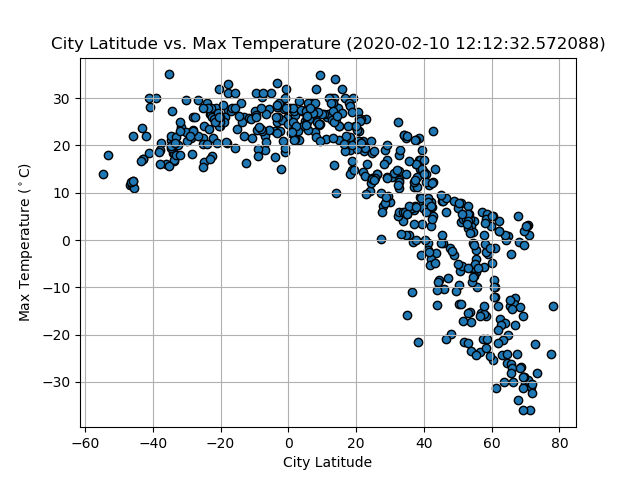

In [14]:
fig1, ax1 = plt.subplots()
latitude = df.Lat
temperature = df.Max_Temp
ax1.scatter(latitude, temperature, marker='o', edgecolors='black')
ax1.set_title(f"City Latitude vs. Max Temperature ({dt.today()})")
ax1.set_xlabel("City Latitude")
ax1.set_ylabel("Max Temperature ($^\circ$C)")
ax1.grid(axis='both')
fig1.savefig("Fig 1 - City Latitude vs. Max Temperature.png")

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


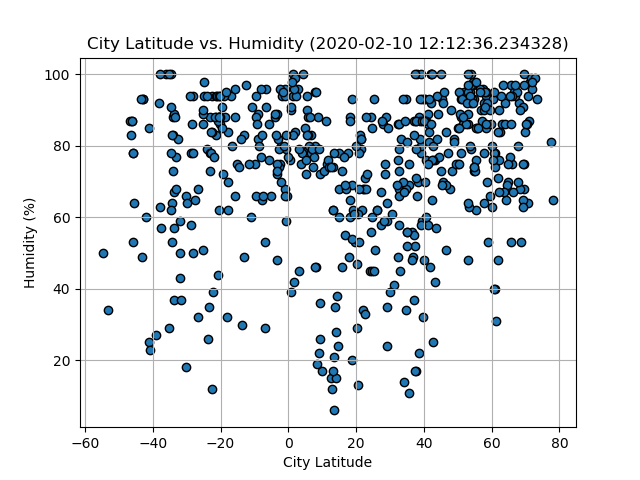

In [15]:
fig2, ax2 = plt.subplots()
latitude = df.Lat
humidity = df.Humidity
ax2.scatter(latitude, humidity, marker='o', edgecolors='black')
ax2.set_title(f"City Latitude vs. Humidity ({dt.today()})")
ax2.set_xlabel("City Latitude")
ax2.set_ylabel("Humidity (%)")
ax2.grid(axis='both')
fig2.savefig(f"Fig 2 - City Latitude vs. Humidity.png")

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


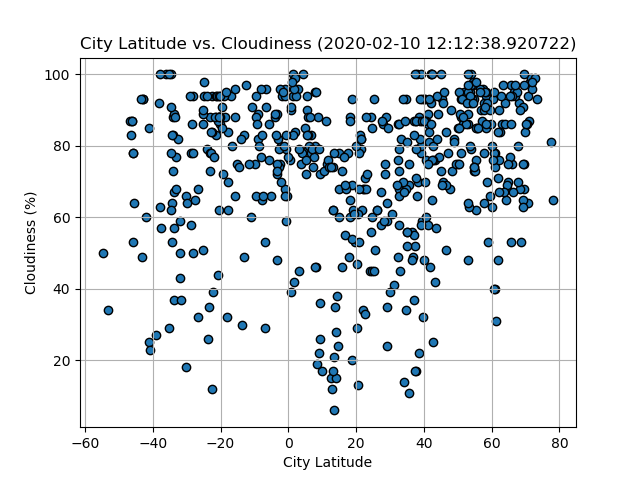

In [16]:
fig3, ax3 = plt.subplots()
latitude = df.Lat
cloudiness = df.Cloudiness
ax3.scatter(latitude, humidity, marker='o', edgecolors='black')
ax3.set_title(f"City Latitude vs. Cloudiness ({dt.today()})")
ax3.set_xlabel("City Latitude")
ax3.set_ylabel("Cloudiness (%)")
ax3.grid(axis='both')
fig3.savefig(f"Fig 3 - City Latitude vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


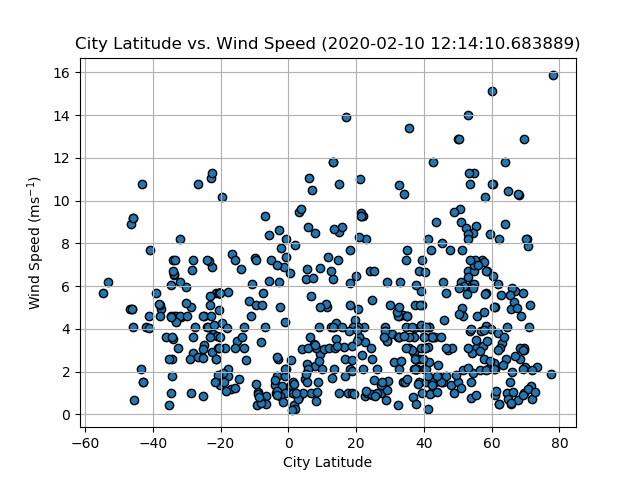

In [19]:
fig4, ax4 = plt.subplots()
latitude = df.Lat
wind_speed = df.Wind_Speed
ax4.scatter(latitude, wind_speed, marker='o', edgecolors='black')
ax4.set_title(f"City Latitude vs. Wind Speed ({dt.today()})")
ax4.set_xlabel("City Latitude")
ax4.set_ylabel("Wind Speed (ms$^{-1}$)")
ax4.grid(axis='both')
fig4.savefig(f"Fig 4 - City Latitude vs Wind Speed)")